<a href="https://colab.research.google.com/github/tensorbytes0202/Machine-learning/blob/main/Random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data = data.dropna()

In [6]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]


In [7]:
X.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5821,-118.31,34.22,27.0,7714.0,1132.0,3199.0,1100.0,7.1262,<1H OCEAN
18742,-122.34,40.57,26.0,2187.0,472.0,1339.0,463.0,2.0395,INLAND
14766,-117.10,32.58,33.0,393.0,76.0,330.0,80.0,4.1029,NEAR OCEAN
15157,-117.06,32.99,16.0,1306.0,196.0,713.0,222.0,6.2683,<1H OCEAN
4804,-118.37,34.03,43.0,1350.0,287.0,811.0,307.0,3.3636,<1H OCEAN


In [8]:
X = pd.get_dummies(X,drop_first=True)

In [9]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R^2 Score:",r2_score(y_test,y_pred))

Mean Squared Error: 2377334334.113249
R^2 Score: 0.8261570087220649


In [16]:
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

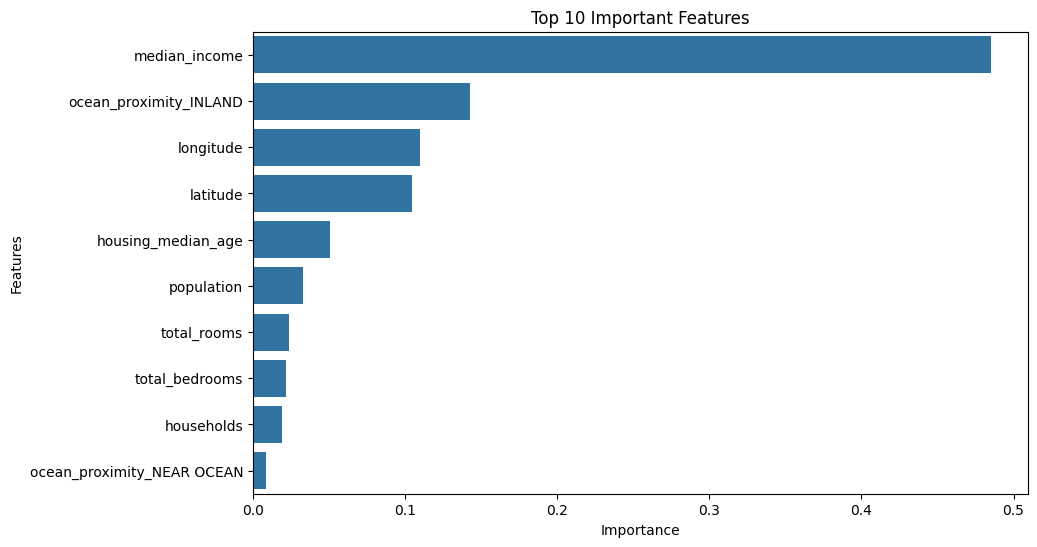

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10],y=feat_imp.index[:10])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()